# Convergence of AB4

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$.

In [6]:
using FundamentalsNumericalComputation

In [7]:
ivp = ODEProblem((u,p,t)->sin((t+u)^2),-1.,(0.0,4.0))

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

We use a solver from `DifferentialEquations` to construct an accurate approximation to the exact solution.

In [8]:
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of the AB4 code.

In [9]:
n = @. 10*2^(0:5)
err = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.ab4(ivp,n)
    err[j] = maximum( @.abs(u_exact(t)-u) )
end

The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors.

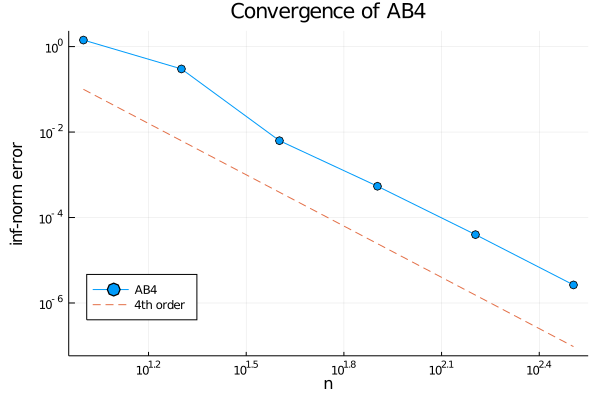

In [10]:
plot(n,err,m=:o,label="AB4",
    xaxis=(:log10,"n"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of AB4",leg=:bottomleft)

plot!(n,0.1*(n/n[1]).^(-4),l=:dash,label="4th order")